# Imports & setup

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from models import *
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchvision.models import ResNet50_Weights

# Training

In [3]:
path_pair_img = '../data/photoshoptest'

weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

dataset = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

In [4]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    model = ResNet()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


    # Create the data loaders for training and validation
    train_dataloader = torch.utils.data.DataLoader(
        train_data,
        batch_size=100,
        shuffle=True
    )

    test_dataloader = torch.utils.data.DataLoader(
        test_data,
        batch_size=100,
        shuffle=False
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        #test_basic(test_dataloader, model) # for cross validation
    print("Done!")



In [5]:
torch.save(model.state_dict(), "./model_Resnet_todelete")

# Test 

In [2]:
model = ResNet()
model.load_state_dict(torch.load("./model_resnet"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
path_pair_img = '../data/photoshoptest_handmade_test'

weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

dataset = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

test_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=5,
    shuffle=False
)

In [4]:
y_true, y_score = test_handmade(test_dataloader, model)

In [5]:
performance = get_performance(y_true, y_score)

In [6]:
#output : 
#   [accuracy, 
#   f1, 
#   precision, 
#   recall, 
#   roc_auc, 
#   conf_mat, 
#   fp, 
#   fn, 
#   tp, 
#   tn]
performance

[0.5367647058823529,
 0.5367647058823529,
 0.5367647058823529,
 0.5367647058823529,
 0.8782671570377776,
 array([[ 1,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  2,  0,  0,  0,  0,  0,  0],
        [ 1,  0, 18,  0,  0,  0,  1,  2],
        [ 3,  0,  0, 10,  0,  6,  3,  0],
        [ 0,  1,  0,  0, 12,  9,  0,  0],
        [ 3,  0,  0,  1,  2, 14,  1,  1],
        [ 0,  0,  0,  5,  0, 10,  6,  1],
        [ 0,  0,  0,  4,  0,  3,  5, 10]], dtype=int64),
 array([ 7,  1,  0, 10,  2, 29, 10,  4], dtype=int64),
 array([ 1,  0,  4, 12, 10,  8, 16, 12], dtype=int64),
 array([ 1,  2, 18, 10, 12, 14,  6, 10], dtype=int64),
 array([127, 133, 114, 104, 112,  85, 104, 110], dtype=int64)]

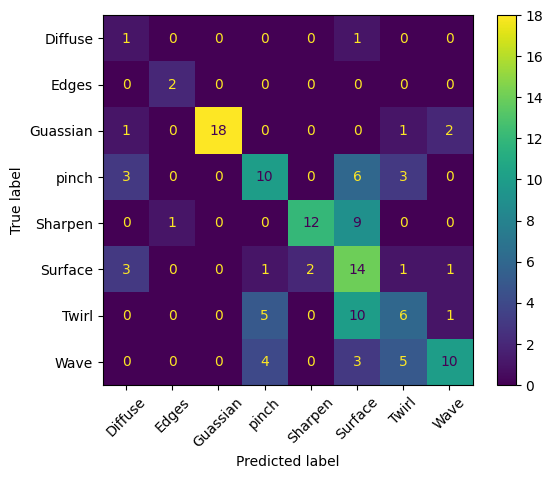

In [7]:
conf_matrix = performance[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()